## 스포츠센터 데이터분석     by 강병준

In [64]:
import matplotlib.pyplot as plt
from matplotlib import rc  
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus']    # 한글깨짐 방지 코드 for mac
import seaborn as sns


# 데이러 로드
import pandas as pd
campaign_master = pd.read_csv('project/campaign_master.csv')
class_master = pd.read_csv('project/class_master.csv')
customer_master = pd.read_csv('project/customer_master.csv')
use_log = pd.read_csv('project/use_log.csv')

In [65]:
campaign_master.head()

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [66]:
class_master.head()

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [112]:
customer_master = pd.read_csv('project/customer_master.csv')

customer_master

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0
...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0


In [68]:
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


# Merge

### customer_master & campaign_master  Merge

In [69]:
# is_deleted 컬럼에서 0-> 유지회원, 1-> 탈퇴회원으로 변경함 
def deleted (x):
    if x == 0:
        return '유지회원'
    elif x == 1:
        return '탈퇴회원'

customer_master["is_deleted"] = customer_master["is_deleted"].apply(deleted)

In [70]:
customer_cam=customer_master.merge(campaign_master, on='campaign_id', how='left')
customer_cam

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반
...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,유지회원,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,유지회원,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,유지회원,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,유지회원,2_일반


In [71]:
customer_cam.info()
# merge한 데이터 정보확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   name           4192 non-null   object
 2   class          4192 non-null   object
 3   gender         4192 non-null   object
 4   start_date     4192 non-null   object
 5   end_date       1350 non-null   object
 6   campaign_id    4192 non-null   object
 7   is_deleted     4192 non-null   object
 8   campaign_name  4192 non-null   object
dtypes: object(9)
memory usage: 327.5+ KB


In [72]:
customer_cam.isnull().sum() 
#null값 확인- end_date에 2842개 확인


customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
campaign_name       0
dtype: int64

## Merge
### customer_cam(customer_master & campaign_maste) & class_master   

In [73]:
customer_cam_cl= customer_cam.merge(class_master, on ='class', how='left')
customer_cam_cl

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,2_야간,6000
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,유지회원,2_일반,2_야간,6000
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500


In [74]:
customer_cam_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   name           4192 non-null   object
 2   class          4192 non-null   object
 3   gender         4192 non-null   object
 4   start_date     4192 non-null   object
 5   end_date       1350 non-null   object
 6   campaign_id    4192 non-null   object
 7   is_deleted     4192 non-null   object
 8   campaign_name  4192 non-null   object
 9   class_name     4192 non-null   object
 10  price          4192 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 393.0+ KB


In [75]:
customer_cam_cl.isnull().sum()  # end_date null값 확인

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
campaign_name       0
class_name          0
price               0
dtype: int64


### campaign_name별  클래스 & 성별 등록 회원수

*  일반회원 > 입회비반액회원 >  입회비무료 회원순으로 등록한 회원들의 수의 크기를 확인할 수있다.

* 종일클래스(C01)> 야간클래스(C03) > 주간클래스 (C02)순으로 회원수의 크키가 나열되어있으며, 

* 주간에는 여성회원수가 월등히 높았으면, 야간에는 남성회원수가 월등히 높았다는 사실을 보았을때,    
  주간에는 주부 또는 점심시간을 할애해 운동하는 여성직장인들, 그리고 야간에는 퇴근 후 운동하는 남성들로 추축해 볼 수 있다.  
  그래서 주간클래스에는 여성들을 위한 운동프로그램으로 요가나, 필라테스, 또는 매달 1회 그룹피티로 이벤트를 진행할 수 있고, 
  남성 회원들이 많은 야간클래스도 그룹 p.t 또는    
  운동시 단백질 제공 또는 아마추어 보디빌딩 대회라는 중단기적인 목표를 주어 지속적인 센터 출석률을 높일 수 있을 거라고 판단된다(종일 고객들도 포함). 

In [76]:
customer_cam_cl.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,2_야간,6000


In [77]:
# campaign_name 별 클래스 등록회원수
customer_cam_cl.groupby('campaign_name')['class'].count()

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: class, dtype: int64

<AxesSubplot:xlabel='campaign_name', ylabel='count'>

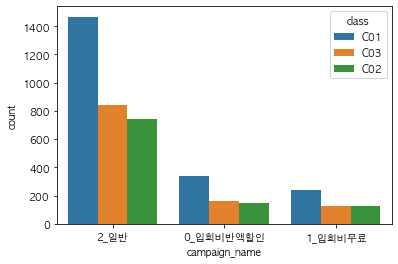

In [78]:
# campaign_name 별 클래스 등록회원수 그래프
# 종일클래스:(C01)   주간클래스:(C02)   야간클래스:(C03) 
# 캠페인에 속한 그룹이(입회반액할인 & 입회비무료)들이 그렇지 않은 일반회원들에 비해 등록률이 현저히 낮은걸로 보았을때 
# 이 캠페인은 그리 효과적이지 못했다고 판단한다. 가격할인이라는 것에 초점을 두는 것 보다 조금 더  회원들에게 운동에 
# 관한 동기부여나 목표를 줄 수 있는 예를들어 철인3종경기 준비부터 완주까지라는 단기 프로젝트 참가인원 모집 같은
# 가격 외의 것들로 회원들을 유치할 수 도 있을 것 같다.
sns.countplot(x='campaign_name' , data=customer_cam_cl, hue='class')

In [79]:
# campaign_name 별 성별 등록회원수 확인
camgen=customer_cam_cl.groupby(['campaign_name','gender']).count()
camgen.loc[:,'customer_id']

campaign_name  gender
0_입회비반액할인      F          286
               M          364
1_입회비무료        F          251
               M          241
2_일반           F         1446
               M         1604
Name: customer_id, dtype: int64

<AxesSubplot:xlabel='campaign_name', ylabel='count'>

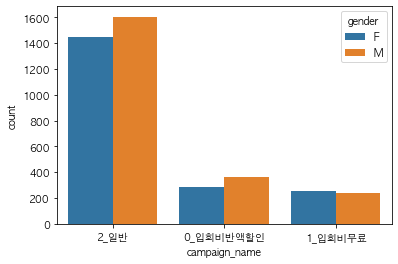

In [80]:
# campaign_name 별 성별 등록회원수 그래프
# 그래프를 보고 확인 할 수 있듯이 남성회원들이 여성회원들에 비해 '입회비무료' 회원들을 제외하고 더 많음을 알 수 있다.
# 여성회원을 더 유치하기 위한 방법들을 구상해 봐도 좋을 것 같다. 예) 여성회원들을 위한 여성 트레이너 모집
sns.countplot(x='campaign_name' , data=customer_cam_cl, hue='gender')

In [81]:
customer_cam_cl.groupby(['class','gender']).count()

customer_id  name  start_date  end_date  campaign_id  \
class gender                                                         
C01   F               822   822         822       261          822   
      M              1223  1223        1223       403         1223   
C02   F               835   835         835       275          835   
      M               184   184         184        69          184   
C03   F               326   326         326        95          326   
      M               802   802         802       247          802   

              is_deleted  campaign_name  class_name  price  
class gender                                                
C01   F              822            822         822    822  
      M             1223           1223        1223   1223  
C02   F              835            835         835    835  
      M              184            184         184    184  
C03   F              326            326         326    326  
      M              802            802         802    802

In [82]:
# 클래스별 성별 회원수 그래프
# 주간에는 여성회원들이 월등히 많고, 야간에는 남성회원들이 월등이 많다.
classgender=customer_cam_cl.groupby(['class','gender']).count()
classgender['customer_id']

class  gender
C01    F          822
       M         1223
C02    F          835
       M          184
C03    F          326
       M          802
Name: customer_id, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

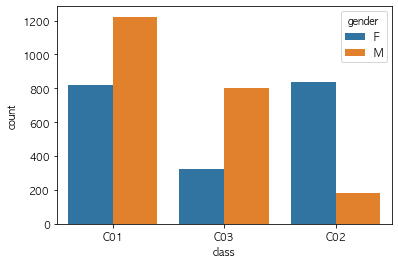

In [83]:
# 클래스별 성별 회원수 그래프
sns.countplot(x='class' , data=customer_cam_cl, hue='gender')

In [84]:
class1=customer_cam_cl.groupby(['campaign_name','gender']).count()
class1['customer_id']

campaign_name  gender
0_입회비반액할인      F          286
               M          364
1_입회비무료        F          251
               M          241
2_일반           F         1446
               M         1604
Name: customer_id, dtype: int64

<AxesSubplot:xlabel='campaign_name', ylabel='count'>

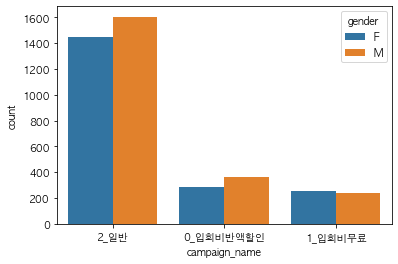

In [85]:
# 입회비 무료를 제외하고 전체적으로 남성회원 수의 비율이 높다.
sns.countplot(x='campaign_name' , data=customer_cam_cl, hue='gender')

### 전체적으로 여성회원 수에 비해 남성회원 수가 많다.
### 여성회원 수를 늘리기 위해 여성회원들을 위한 특별한 이벤트가 필요할듯 합니다.

In [86]:
customer_cam_cl[['gender', 'campaign_id', 'campaign_name']].value_counts()

gender  campaign_id  campaign_name
M       CA1          2_일반             1604
F       CA1          2_일반             1446
M       CA2          0_입회비반액할인         364
F       CA2          0_입회비반액할인         286
        CA3          1_입회비무료           251
M       CA3          1_입회비무료           241
dtype: int64

In [87]:
# 성별, 가격의 총합- 남성고객의 합이 2184000원 더 많음
g=customer_cam_cl.groupby('gender')['price'].sum()
g

gender
F    16849500
M    19033500
Name: price, dtype: int64

In [88]:
cg=customer_cam_cl[['class_name','gender']].value_counts()
cg

class_name  gender
0_종일        M         1223
1_주간        F          835
0_종일        F          822
2_야간        M          802
            F          326
1_주간        M          184
dtype: int64

### 최신고객 데이터 집계

 * 최신고객(2019-3월) 총 65 신규고객 발생

In [89]:
new_member=customer_cam_cl.sort_values(by='start_date', ascending=False).reset_index()
new_member.head(5)

,index,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,4191,IK692635,XXXXX,C02,F,2019-03-15 00:00:00,NaN,CA1,유지회원,2_일반,1_주간,7500
1,4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
2,4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,유지회원,2_일반,2_야간,6000
3,4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
4,4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500


In [90]:
new_one=new_member.iloc[:65,[4,5,9,10]]
new_one

,gender,start_date,campaign_name,class_name
0,F,2019-03-15 00:00:00,2_일반,1_주간
1,M,2019-03-14 00:00:00,2_일반,0_종일
2,M,2019-03-14 00:00:00,2_일반,2_야간
3,F,2019-03-14 00:00:00,2_일반,0_종일
4,M,2019-03-14 00:00:00,2_일반,0_종일
...,...,...,...,...
60,M,2019-03-01 00:00:00,2_일반,2_야간
61,M,2019-03-01 00:00:00,2_일반,0_종일
62,F,2019-03-01 00:00:00,2_일반,2_야간
63,F,2019-03-01 00:00:00,2_일반,0_종일


In [91]:
# 최근 3월 달에 총 65 신규고객중 남자고객이 33, 여자고객이 32  성별 고객 유입수 비슷함.
new_one.groupby('gender')['campaign_name'].count()

gender
F    32
M    33
Name: campaign_name, dtype: int64

In [92]:
new_one.groupby('class_name')['campaign_name'].count()

class_name
0_종일    31
1_주간    16
2_야간    18
Name: campaign_name, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class_name', ylabel='count'>

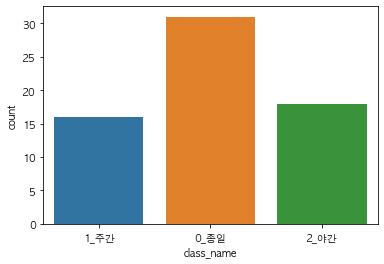

In [93]:
# 신규최원중 종일회원이 31, 주간회원이 16, 야간회원이 18 회비가 가장비싼 종일회원의 회원수가 가장 높은 비율을 차지함.
sns.countplot(new_one['class_name'])

In [94]:
customer_cam_cl.groupby(['class_name', 'campaign_id'])['campaign_name'].count()
# CA1 일반 / CA2 입회비반액할인 /CA3 입회비무료 
# 입회비가 무료입에도 불구하고 모든 반에서 회원인원수가 가장적다. 
# 입회비 무료 이벤트는 큰 메리트는 없는것으로 파악되어 다음에는 다른 이벤트로 대체해야 될 것으로 봐야할것 같다.

class_name  campaign_id
0_종일        CA1            1467
            CA2             338
            CA3             240
1_주간        CA1             744
            CA2             147
            CA3             128
2_야간        CA1             839
            CA2             165
            CA3             124
Name: campaign_name, dtype: int64

### 유저별 월평균 이용횟수

In [95]:
use_log['usedate'] = pd.to_datetime(use_log['usedate'])
use_log['use_month'] = use_log['usedate'].dt.strftime('%Y%m')

In [96]:
uselog=use_log.groupby(['customer_id','usedate'])['log_id'].count()
uselog

customer_id  usedate   
AS002855     2018-04-07    1
             2018-04-14    1
             2018-04-21    1
             2018-04-28    1
             2018-05-05    1
                          ..
TS999855     2019-02-23    1
             2019-03-02    1
             2019-03-09    1
             2019-03-16    1
             2019-03-23    1
Name: log_id, Length: 197428, dtype: int64

###  유저별 이용횟수의 통계량

In [97]:
user_decribe=use_log.groupby(['customer_id'])['log_id'].count()
user_decribe.head()


customer_id
AS002855    54
AS008805    40
AS009013     2
AS009373    61
AS015233    83
Name: log_id, dtype: int64

In [98]:
user_decribe.describe()

count    4192.000000
mean       47.096374
std        24.218124
min         1.000000
25%        26.000000
50%        53.000000
75%        65.000000
max       105.000000
Name: log_id, dtype: float64

### 탈퇴회원과 지속회원의 차이를 파악

In [99]:
customer_cam_cl.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,2_야간,6000


In [100]:
customer_cam_cl['is_deleted'].value_counts()
# 탈퇴회원: 2842명
# 유지회원: 1350명
# 총 4192 명

유지회원    2842
탈퇴회원    1350
Name: is_deleted, dtype: int64

In [101]:
customer_cam_cl[['gender','is_deleted']].value_counts()
#탈퇴한 남성회원 : 1490명
#탈퇴한 여성회원 : 1352명
#지속중인 남성회원 : 719
#지속중인 여성회원 : 631
# 총 4192 명

gender  is_deleted
M       유지회원          1490
F       유지회원          1352
M       탈퇴회원           719
F       탈퇴회원           631
dtype: int64

<AxesSubplot:xlabel='is_deleted', ylabel='count'>

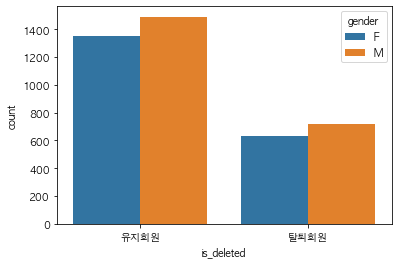

In [102]:
# 성별 유지회원 및 탈퇴회원 비율
sns.countplot(x='is_deleted', data=customer_cam_cl, hue='gender')

In [103]:
customer_cam_cl.describe()

# 가격대의 종류를 늘리고 그에 해당하는 적절한 프로모션이 필요. ex) 3_새벽반 5천원 (6시~8시)) / 4_주말반 4천원 (대신 주말만 가능)

,price
count,4192.000000
mean,8559.875954
std,1968.128971
min,6000.000000
25%,6000.000000
50%,7500.000000
75%,10500.000000
max,10500.000000


In [104]:
customer_cam_cl[['class_name','price']].value_counts()

class_name  price
0_종일        10500    2045
2_야간        6000     1128
1_주간        7500     1019
dtype: int64

In [105]:
use_log['usedate'] = pd.to_datetime(use_log['usedate'])
use_log['use_month']=use_log['usedate'].dt.strftime('%Y%m')

In [106]:
use_log.head()

,log_id,customer_id,usedate,use_month
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


### 무료회원

In [107]:
ca3=customer_cam_cl[customer_cam_cl['campaign_id']=='CA3']
ca3

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
2336,IK524314,XXXX,C01,M,2017-12-01 00:00:00,2018-05-31 00:00:00,CA3,탈퇴회원,1_입회비무료,0_종일,10500
2337,TS218627,XXXXX,C02,F,2017-12-01 00:00:00,2018-07-31 00:00:00,CA3,탈퇴회원,1_입회비무료,1_주간,7500
2338,GD401728,XXXXX,C01,M,2017-12-01 00:00:00,NaN,CA3,유지회원,1_입회비무료,0_종일,10500
2339,PL147335,XXXXXX,C03,M,2017-12-01 00:00:00,NaN,CA3,유지회원,1_입회비무료,2_야간,6000
2340,IK142972,XXXXX,C01,F,2017-12-01 00:00:00,NaN,CA3,유지회원,1_입회비무료,0_종일,10500
...,...,...,...,...,...,...,...,...,...,...,...
3958,PL405819,XXXX,C01,M,2018-12-15 00:00:00,NaN,CA3,유지회원,1_입회비무료,0_종일,10500
3959,HI958991,XXXXX,C01,F,2018-12-15 00:00:00,NaN,CA3,유지회원,1_입회비무료,0_종일,10500
3960,IK039344,XXX,C03,M,2018-12-15 00:00:00,NaN,CA3,유지회원,1_입회비무료,2_야간,6000
3961,TS950243,XXXX,C01,M,2018-12-15 00:00:00,NaN,CA3,유지회원,1_입회비무료,0_종일,10500


In [108]:
# 입회비 무료 여성회원들은  종일(C01)&주간(C02)반에 비해 야간반(C03) 등록이 현적히 적었으며
#  입회비 무료 남성회원들은 종일반과 야간반에 비해 주간반 등록이 현저히 적었다.
# 무료 여성 회원들은 점심사간이나,오후시간에 운동을 선호하며
# 무료 남성 회원들은 주간에 비해 퇴근후에 운동을 하는 회원들이 많다는 것을 알 수 있다.
# 이것을 통해서 무료 여성회원들에게는 주간에 그리고 무료 남성회원들에게는 야간에 이벤트나 프로모션을 적용한다면 
# 더 많은 회원을 유치할 수 있을 것이라고 생각된다.
# CA1-3050명,CA2-650명, CA3(무료회원)-492명  무료회원 수는 일반+반액할인 회원수 합의 약 10%정도이다.
ca3.groupby(['gender','class'])['class_name'].count()

gender  class
F       C01      110
        C02      104
        C03       37
M       C01      130
        C02       24
        C03       87
Name: class_name, dtype: int64

In [109]:
customer_cam_cl[customer_cam_cl['campaign_id']=='CA3'].count()


customer_id      492
name             492
class            492
gender           492
start_date       492
end_date         273
campaign_id      492
is_deleted       492
campaign_name    492
class_name       492
price            492
dtype: int64

In [110]:
ca1=customer_cam_cl[customer_cam_cl['campaign_id']=='CA1']
ca1.count()

customer_id      3050
name             3050
class            3050
gender           3050
start_date       3050
end_date          709
campaign_id      3050
is_deleted       3050
campaign_name    3050
class_name       3050
price            3050
dtype: int64

In [111]:
ca2=customer_cam_cl[customer_cam_cl['campaign_id']=='CA2']
ca2.count()

customer_id      650
name             650
class            650
gender           650
start_date       650
end_date         368
campaign_id      650
is_deleted       650
campaign_name    650
class_name       650
price            650
dtype: int64

In [139]:
use_log.head()

,log_id,customer_id,usedate,use_month
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [144]:
# use_log  usedate 년월 변환
use_log['usedate']=pd.to_datetime(use_log['usedate'])
use_log['use_month'] = use_log['usedate'].dt.strftime('%Y%m')
use_log.head()

,log_id,customer_id,usedate,use_month
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


# Merge

## customer_cam_cl & use_log

In [113]:
c_cam_log = customer_cam_cl.merge(use_log, on='customer_id', how='left')
c_cam_log

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,log_id,usedate,use_month
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500,L00000049014216,2018-04-04,201804
1,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500,L00000049018989,2018-04-13,201804
2,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500,L00000049030118,2018-05-03,201805
3,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500,L00000049031667,2018-05-06,201805
4,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,유지회원,2_일반,0_종일,10500,L00000049033751,2018-05-10,201805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,IK692635,XXXXX,C02,F,2019-03-15 00:00:00,NaN,CA1,유지회원,2_일반,1_주간,7500,L00000049204803,2019-03-22,201903
197424,IK692635,XXXXX,C02,F,2019-03-15 00:00:00,NaN,CA1,유지회원,2_일반,1_주간,7500,L00000049205312,2019-03-23,201903
197425,IK692635,XXXXX,C02,F,2019-03-15 00:00:00,NaN,CA1,유지회원,2_일반,1_주간,7500,L00000049206326,2019-03-25,201903
197426,IK692635,XXXXX,C02,F,2019-03-15 00:00:00,NaN,CA1,유지회원,2_일반,1_주간,7500,L00000049207430,2019-03-27,201903


In [158]:
c_cam_log['start_date']=pd.to_datetime(c_cam_log['start_date'])
c_cam_log['end_date']=pd.to_datetime(c_cam_log['end_date'])

In [154]:
c_cam_log['end_date']=c_cam_log['end_date'].fillna(c_cam_log['end_date'].mean())

In [ ]:

c_cam_log['useperiod']= c_cam_log['end_date'] - c_cam_log['start_date']

In [163]:
c_cam_log.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,log_id,usedate,use_month,useperiod
0,OA832399,XXXX,C01,F,2015-05-01,2018-12-18 09:28:18.011807488,CA1,유지회원,2_일반,0_종일,10500,L00000049014216,2018-04-04,201804,1327 days 09:28:18.011807488
1,OA832399,XXXX,C01,F,2015-05-01,2018-12-18 09:28:18.011807488,CA1,유지회원,2_일반,0_종일,10500,L00000049018989,2018-04-13,201804,1327 days 09:28:18.011807488
2,OA832399,XXXX,C01,F,2015-05-01,2018-12-18 09:28:18.011807488,CA1,유지회원,2_일반,0_종일,10500,L00000049030118,2018-05-03,201805,1327 days 09:28:18.011807488


## 위 데이터들의 분석한 내용들을 바탕으로 대표님의 스포츠센터 운영에 참조하신다면 많은 도움이 될 것이라고 생각됩니다.
## 포츠센터에 눈부신 발전을 기원합니다.